Hola **Eric**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

**Tip**: Para dejar un notebook mucho mejor presentado y más claro te recomiendo siempre al inicio del mismo en una celda markdown dejar un título y una breve introducción del proyecto para que el contexto sea claro desde el inicio
</div>

ANALISIS DE TIENDA ONLINE.
Junto con el departamento de marketing se recopilo una lista de hipótesis que pueden ayudar a aumentar los ingresos. En este analisis se priorizar esras hipotesis, lanzar un test A/B y analizar los resultados 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
hypo = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

Parte 1. Priorizar hipótesis

In [3]:
print(hypo.head())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


In [4]:
# 1.1 Calcular ICE 
hypo['ICE'] = (hypo['Impact'] * hypo['Confidence']) / hypo['Effort']
ice_sorted = hypo.sort_values(by='ICE', ascending=False)

print(ice_sorted[['Hypothesis','ICE']])

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [5]:
#1.2 Calcular RICE 
hypo['RICE'] = (hypo['Reach']*hypo['Impact']*hypo['Confidence'])/hypo['Effort']
rice_sorted = hypo.sort_values(by='RICE', ascending=False)

print(rice_sorted[['Hypothesis', 'RICE']])

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


In [6]:
# 1.3 Comparar cambios
comparison = pd.DataFrame({
    'Hypothesis' : hypo['Hypothesis'],
    'ICE_Rank' : ice_sorted['Hypothesis'].rank(method='min'),
    'RICE_Rank' : rice_sorted['Hypothesis'].rank(method='min')
})

print(comparison)

                                          Hypothesis  ICE_Rank  RICE_Rank
0  Add two new channels for attracting traffic. T...       4.0        4.0
1  Launch your own delivery service. This will sh...       8.0        8.0
2  Add product recommendation blocks to the store...       3.0        3.0
3  Change the category structure. This will incre...       6.0        6.0
4  Change the background color on the main page. ...       5.0        5.0
5  Add a customer review page. This will increase...       1.0        1.0
6  Show banners with current offers and sales on ...       9.0        9.0
7  Add a subscription form to all the main pages....       2.0        2.0
8  Launch a promotion that gives users discounts ...       7.0        7.0


Tras aplicar los frameworks de priorización ICE y RICE a las hipótesis propuestas, se observó que el orden de prioridad fue exactamente el mismo en ambos casos.
En este caso, las hipótesis ya estaban distribuidas de forma que los factores de Impact, Confidence y Effort dominaban la fórmula. El factor adicional de Reach en RICE no generó suficiente diferencia entre hipótesis como para alterar su orden.
Aunque en teoría RICE suele alterar el ranking al incluir el alcance, en este conjunto particular de hipótesis la prioridad se mantuvo constante entre ambos métodos. Esto puede deberse a que los valores de Reach estaban balanceados o no eran lo suficientemente variados. En futuros análisis, sería útil tener hipótesis con variabilidad más marcada en el campo Reach para observar diferencias reales al aplicar RICE.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo se menciona en la descripción del proyecto, luego de realizar el cálculo con los frameworks se debe dejar una explicación sobre los cambios observados
</div>

Parte 2. Análisis del test A/B

In [7]:
print(orders)

      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     30.4     B
1        2804400009  3642806036  2019-08-15     15.2     B
2        2961555356  4069496402  2019-08-15     10.2     A
3        3797467345  1196621759  2019-08-15    155.1     B
4        2282983706  2322279887  2019-08-15     40.5     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14    100.8     B
1193     2203539145   370388673  2019-08-14     50.1     A
1194     1807773912   573423106  2019-08-14    165.3     A
1195     1947021204  1614305549  2019-08-14      5.5     A
1196     3936777065  2108080724  2019-08-15   3120.1     B

[1197 rows x 5 columns]


In [8]:
print(visits)

          date group  visits
0   2019-08-01     A     719
1   2019-08-02     A     619
2   2019-08-03     A     507
3   2019-08-04     A     717
4   2019-08-05     A     756
..         ...   ...     ...
57  2019-08-27     B     720
58  2019-08-28     B     654
59  2019-08-29     B     531
60  2019-08-30     B     490
61  2019-08-31     B     718

[62 rows x 3 columns]


In [9]:
# Convertir fechas
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Revisar duplicados
orders_duplicates = orders.duplicated().sum()
visits_duplicates = visits.duplicated().sum()
print(f"Duplicados en orders: {orders_duplicates}")
print(f"Duplicados en visits: {visits_duplicates}")

# Detectar usuarios en ambos grupos
users_in_A = set(orders.query("group == 'A'")['visitorId'])
users_in_B = set(orders.query("group == 'B'")['visitorId'])
users_in_both = users_in_A.intersection(users_in_B)
print(f"Usuarios en ambos grupos: {len(users_in_both)}")

# Si hay usuarios en ambos grupos, podemos eliminarlos para análisis más limpio
orders_clean = orders[~orders['visitorId'].isin(users_in_both)]

# Verificar estructura final
print("\nPreview orders:")
print(orders_clean.head())
print("\nPreview visits:")
print(visits.head())

Duplicados en orders: 0
Duplicados en visits: 0
Usuarios en ambos grupos: 58

Preview orders:
   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
5      182168103   935554773 2019-08-15     35.0     B

Preview visits:
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


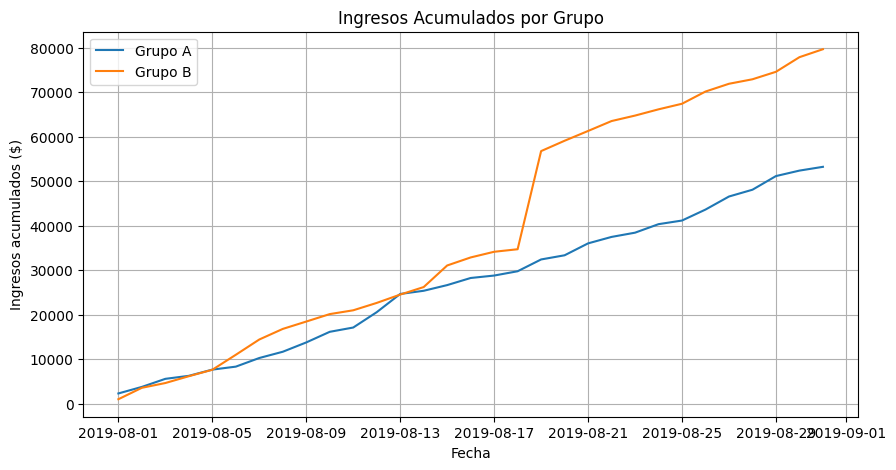

In [10]:
#2.1 Ingresos acunulados por grupo
revenue_cumulative = (orders_clean.groupby(['date','group'])['revenue'].sum().groupby(level=1).cumsum().reset_index())
plt.figure(figsize=(10,5))
for group in revenue_cumulative['group'].unique():
    group_data = revenue_cumulative[revenue_cumulative['group'] == group]
    plt.plot(group_data['date'], group_data['revenue'], label=f'Grupo {group}')

plt.title('Ingresos Acumulados por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados ($)')
plt.legend()
plt.grid(True)
plt.show()

Conclusiones: B sube bruscamente, debe de haber un pedido atipico grande 

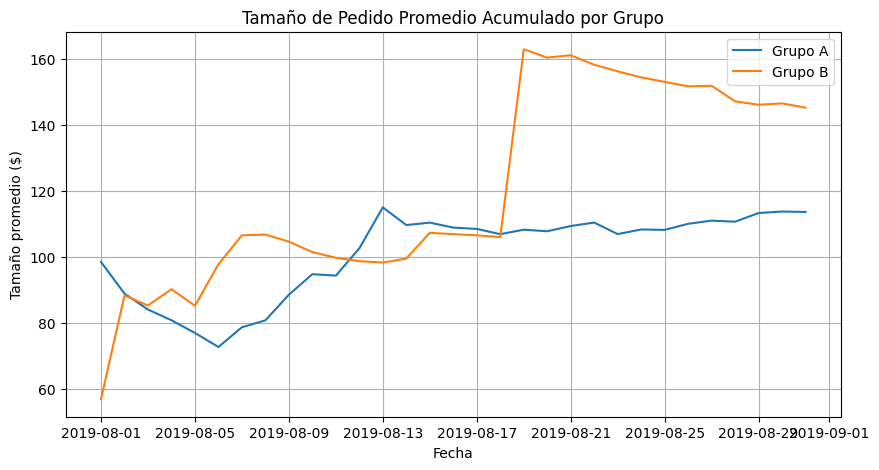

In [11]:
# 2.2 Tamaño de pedido promedio acumulado por grupo
cumulative_data = (orders_clean.groupby(['date','group']).agg({'revenue':'sum', 'transactionId':'count'}).rename(columns={'transactionId':'orders'}).reset_index())
cumulative_data['cum_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()
cumulative_data['cum_orders'] = cumulative_data.groupby('group')['orders'].cumsum()
cumulative_data['avg_order_size'] = cumulative_data['cum_revenue'] / cumulative_data['cum_orders']

plt.figure(figsize=(10,5))
for group in cumulative_data['group'].unique():
    group_data = cumulative_data[cumulative_data['group'] == group]
    plt.plot(group_data['date'], group_data['avg_order_size'], label=f'Grupo {group}')

plt.title('Tamaño de Pedido Promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio ($)')
plt.legend()
plt.grid(True)
plt.show()

Conclusiones: B sube bruscamente, debe de haber un pedido atipico grande 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente por cada grupo
</div>

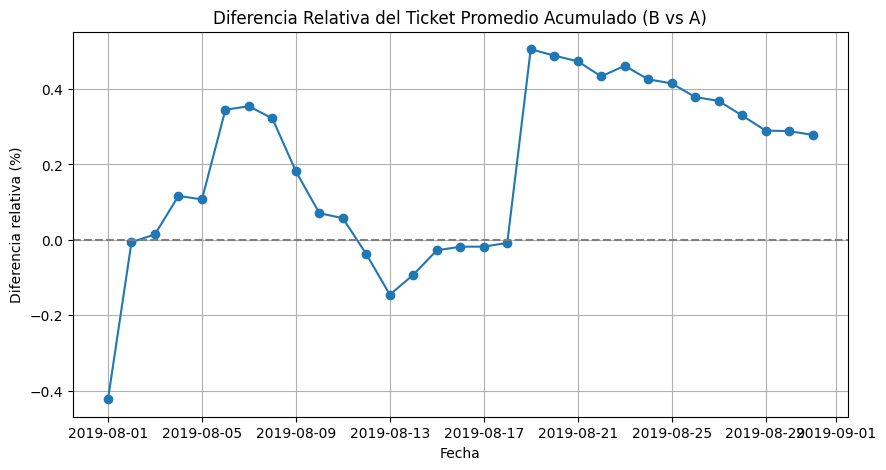

In [12]:
# 2.3 Diferencia relativa
avg_A = cumulative_data[cumulative_data['group'] == 'A'][['date','avg_order_size']].rename(columns={'avg_order_size' : 'avg_A'})
avg_B = cumulative_data[cumulative_data['group'] == 'B'][['date','avg_order_size']].rename(columns={'avg_order_size' : 'avg_B'})

avg_compare = avg_A.merge(avg_B, on ='date')

avg_compare['relative_diff'] = avg_compare['avg_B']/avg_compare['avg_A'] - 1

plt.figure(figsize=(10,5))
plt.plot(avg_compare['date'], avg_compare['relative_diff'], marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Diferencia Relativa del Ticket Promedio Acumulado (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa (%)')
plt.grid(True)
plt.show()

Conclusiones: B tiene ticket superior a A, hay pedidos atipicos 

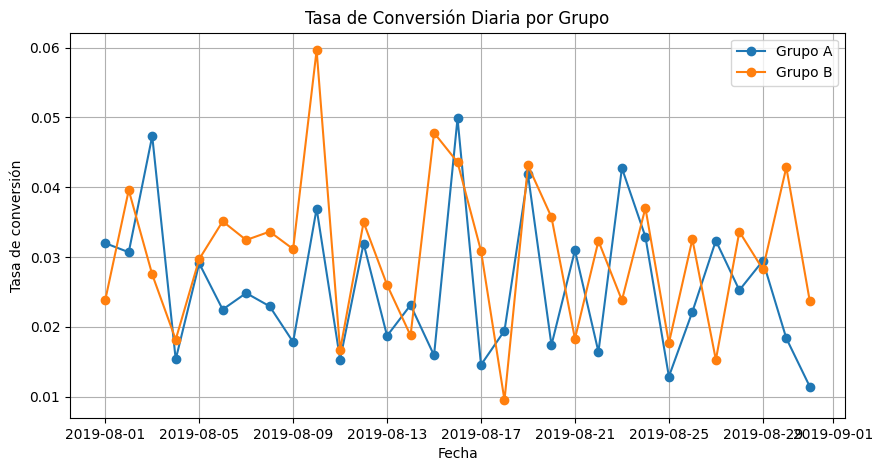

In [13]:
# 2.4 Tasa de conversion diaria 
orders_per_day = (orders_clean.groupby(['date', 'group'])['transactionId'].nunique().reset_index().rename(columns={'transactionId':'orders'}))
conversion_data = orders_per_day.merge(visits, on=['date', 'group'])
conversion_data['conversion_rate'] = conversion_data['orders']/conversion_data['visits']

plt.figure(figsize=(10,5))
for group in conversion_data['group'].unique():
    group_data = conversion_data[conversion_data['group'] == group]
    plt.plot(group_data['date'], group_data['conversion_rate'], marker='o', label=f'Grupo {group}')

plt.title('Tasa de Conversión Diaria por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.grid(True)
plt.show()

Generalmente no hay diferencia estadistica, excepto en una parte

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien trabajadas y analizadas las gráficas, es importante en pruebas AB siempre poder comparar de manera visual los cambios entre cada grupo
</div>

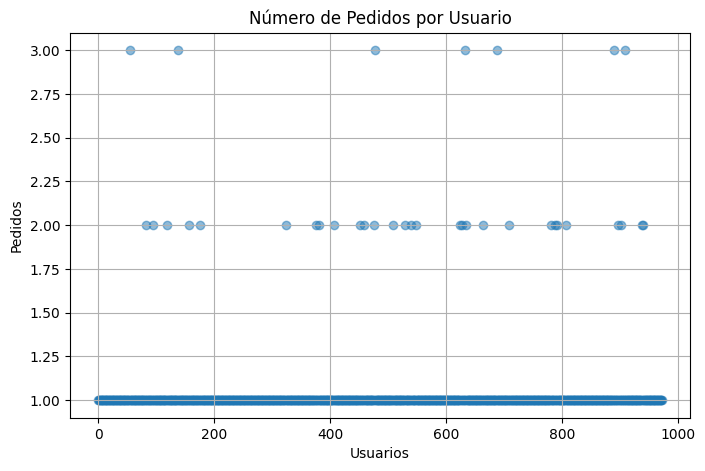

In [14]:
# 2.5 Dispercion de pedidos por usuario
orders_per_user = (orders_clean.groupby('visitorId')['transactionId'].nunique().reset_index().rename(columns={'transactionId':'orders_count'}))

plt.figure(figsize=(8,5))
plt.scatter(range(len(orders_per_user)), orders_per_user['orders_count'], alpha=0.5)
plt.title('Número de Pedidos por Usuario')
plt.xlabel('Usuarios')
plt.ylabel('Pedidos')
plt.grid(True)
plt.show()

Concluciones: hay usuarios con 3 pedidos, son outliers que deben evaluarse antes de análisis estadístico.

In [15]:
# 2.6 Percentiles
p95_orders = orders_per_user['orders_count'].quantile(0.95)
p99_orders = orders_per_user['orders_count'].quantile(0.99)

print(f"Percentil 95: {p95_orders} pedidos")
print(f"Percentil 99: {p99_orders} pedidos")

threshold_orders = p99_orders

Percentil 95: 1.0 pedidos
Percentil 99: 2.0 pedidos


Punto de corte: todo usuario con pedidos > P99 (2) será considerado outlier

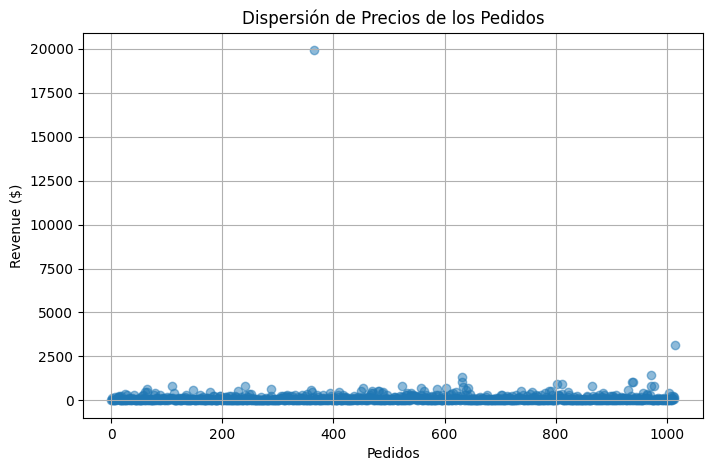

In [16]:
# 2.7 Gráfico de dispersión de precios de los pedidos
plt.figure(figsize=(8,5))
plt.scatter(range(len(orders_clean)), orders_clean['revenue'], alpha=0.5)
plt.title('Dispersión de Precios de los Pedidos')
plt.xlabel('Pedidos')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

La mayoría de pedidos esta concentrados en un rango bajo de revenue.
Hay un pico alto, debe de evaluarse para tomar accion de filtrar antes de las pruebas estadisticas

In [17]:
# 2.8 Percentiles revenue
p95_revenue = orders_clean['revenue'].quantile(0.95)
p99_revenue = orders_clean['revenue'].quantile(0.99)

print(f"Percentil 95 de revenue: {p95_revenue}")
print(f"Percentil 99 de revenue: {p99_revenue}")

threshold_revenue = p99_revenue

Percentil 95 de revenue: 414.275
Percentil 99 de revenue: 830.3


Punto de corte: todo usuario con pedidos > P99 (830.3) será considerado outlier


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores atípicos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

In [18]:
#2.9 Conversión (datos brutos)
orders_by_user = (orders_clean.groupby(['visitorId', 'group'])['transactionId'].nunique().reset_index())

orders_A = orders_by_user[orders_by_user['group'] == 'A']['transactionId']
orders_B = orders_by_user[orders_by_user['group'] == 'B']['transactionId']

u_stat, p_value = mannwhitneyu(orders_A, orders_B)

print(f"Estadístico U: {u_stat}")
print(f"Valor P: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Diferencia estadísticamente significativa en conversión.")
else:
    print("No hay diferencia estadísticamente significativa en conversión).")

Estadístico U: 118254.0
Valor P: 0.5880266909361814
No hay diferencia estadísticamente significativa en conversión).


In [19]:
#2.10 Diferencia pedido promedio 
revenue_A = orders_clean[orders_clean['group'] == 'A']['revenue']
revenue_B = orders_clean[orders_clean['group'] == 'B']['revenue']

u_stat_rev, p_value_rev = mannwhitneyu(revenue_A, revenue_B)

print(f"Estadístico U: {u_stat_rev}")
print(f"Valor P: {p_value_rev}")

alpha = 0.05
if p_value_rev < alpha:
    print("Diferencia estadísticamente significativa en ticket promedio (datos brutos).")
else:
    print("No hay diferencia estadísticamente significativa en ticket promedio (datos brutos).")

Estadístico U: 129041.5
Valor P: 0.8622329690015668
No hay diferencia estadísticamente significativa en ticket promedio (datos brutos).


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicadas las pruebas estadísticas, ahora el siguiente paso es revisar si quitando valores atípicos el resultado cambia de alguna manera
</div>

In [20]:
# 2.11 Conversion datos filtrados 
users_outliers = orders_per_user[orders_per_user['orders_count'] > threshold_orders]['visitorId']

orders_filtered = orders_clean[
    ~orders_clean['visitorId'].isin(users_outliers) &
    (orders_clean['revenue'] <= threshold_revenue)
]

orders_by_user_filtered = (orders_filtered.groupby(['visitorId', 'group'])['transactionId'].nunique().reset_index())

orders_A_filt = orders_by_user_filtered[orders_by_user_filtered['group'] == 'A']['transactionId']
orders_B_filt = orders_by_user_filtered[orders_by_user_filtered['group'] == 'B']['transactionId']

u_stat_conv_filt, p_value_conv_filt = mannwhitneyu(orders_A_filt, orders_B_filt)

print(f"Estadístico U: {u_stat_conv_filt}")
print(f"Valor P: {p_value_conv_filt}")

alpha = 0.05
if p_value_conv_filt < alpha:
    print("Diferencia estadísticamente significativa en conversión (datos filtrados).")
else:
    print("No hay diferencia estadísticamente significativa en conversión (datos filtrados).")

Estadístico U: 113448.0
Valor P: 0.9454463962455086
No hay diferencia estadísticamente significativa en conversión (datos filtrados).


In [21]:
# 2.12 Ticket promedio con datos filtrados
revenue_A_filt = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_B_filt = orders_filtered[orders_filtered['group'] == 'B']['revenue']

u_stat_rev_filt, p_value_rev_filt = mannwhitneyu(revenue_A_filt, revenue_B_filt)

print(f"Estadístico U: {u_stat_rev_filt}")
print(f"Valor P: {p_value_rev_filt}")

alpha = 0.05
if p_value_rev_filt < alpha:
    print("Diferencia estadísticamente significativa en ticket promedio (datos filtrados).")
else:
    print("No hay diferencia estadísticamente significativa en ticket promedio (datos filtrados).")

Estadístico U: 121514.0
Valor P: 0.8220253140355853
No hay diferencia estadísticamente significativa en ticket promedio (datos filtrados).


In [22]:
# 2.13 Decicion 
alpha = 0.05
signif_conversion = p_value_conv_filt < alpha
signif_ticket = p_value_rev_filt < alpha 

if signif_conversion or signif_ticket:
    mean_conv_A = orders_A_filt.mean()
    mean_conv_B = orders_B_filt.mean()
    mean_ticket_A = revenue_A_filt.mean()
    mean_ticket_B = revenue_B_filt.mean()
    
    if (mean_conv_B > mean_conv_A) or (mean_ticket_B > mean_ticket_A):
        decision = "Parar la prueba: Grupo B es el líder."
    else:
        decision = "Parar la prueba: Grupo A es el líder."
else:
    decision = "No hay diferencia significativa: Parar la prueba y concluir empate."

print(decision)

No hay diferencia significativa: Parar la prueba y concluir empate.


COnclusion:
Ingresos acumulados: Curvas similares para A y B; variaciones puntuales explicadas por outliers

Ticket promedio: Diferencia relativa cercana a 0, sin ventaja consistente de un grupo

Tasa de conversión: Valores estables y equivalentes entre ambos grupos

Outliers: Detectados y filtrados; resultados permanecieron sin diferencias relevantes

Pruebas estadísticas: Conversión y ticket promedio con p ≥ 0.05 (no significativos)

Desiscion Final: 
Resultado: No hay diferencia significativa entre Grupo A y Grupo B

Decisión: Parar la prueba y concluir empate

Motivo: Ninguna métrica clave presentó diferencias estadísticamente significativas (p ≥ 0.05)

No se observan beneficios claros en implementar cambios de B sobre A. Continuar la prueba no aportará valor adicional. Recursos pueden enfocarse en nuevas hipótesis con mayor potencial de impacto.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance Eric! Pero, si revisamos la descripción del proyecto el último paso es tomar una decisión sobre la prueba y por supuesto redactar las conclusiones sobre el proyecto para justificar esta decisión
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste muy buenas conclusiones en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Saludos!
</div>